In [1]:
import sympy 

# 1. One dimensional taylor series

$$
P_n(x) = f(c) + f'(c)(x - c) + \frac{f''(c)}{2!}(x - c)^2 + \cdots + \frac{f^{(n)}(c)}{n!}(x-c)^n
$$

$$
f(x)= f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+ \frac{f'''(x_0)}{3!}(x-x_0)^3+\cdots,
$$
$$
f(x+h)= f(x)+f'(x)h+\frac{f''(x)}{2!}h^2+ \frac{f'''(x)}{3!}h^3+\cdots.
$$

In [2]:
from inspect import *
def get_polynomial(function, x0, h,degree):
    # parse function definition code

    lines_list  = getsource(function).split("\n")
    for line in lines_list:
        if '=' in line:
            func_def = line

    elements = func_def.split('=')
    line = ' '.join(elements[1:])
    sympy_function = sympy.sympify(line)

    # compute taylor expansion symbolically 
    i = 0
    taylor_exp = sympy.Integer(0)
    while i <= degree:
        taylor_exp = taylor_exp + (sympy.diff(sympy_function,x,i).subs(x,x0))/(sympy.factorial(i))*(h)**i
        i += 1
    return taylor_exp

In [3]:
x= sympy.Symbol('x')
h= sympy.Symbol('h')

def func_1(x):
    func = f(x)
    return func

get_polynomial(func_1,x,h,3)

h**3*Derivative(f(x), (x, 3))/6 + h**2*Derivative(f(x), (x, 2))/2 + h*Derivative(f(x), x) + f(x)

In [4]:
x= sympy.Symbol('x')
h= sympy.Symbol('h')

def func_2(x):
    func = cos(x)
    return func

get_polynomial(func_2,x,3*h,3)

9*h**3*sin(x)/2 - 9*h**2*cos(x)/2 - 3*h*sin(x) + cos(x)

# 2. Two dimensionals taylor series

### Warming Up 1

In [5]:
expr=x*sympy.sin(x*x)+1
expr

x*sin(x**2) + 1

In [6]:
sympy.diff(expr,x)

2*x**2*cos(x**2) + sin(x**2)

In [7]:
sympy.diff(sympy.cos(x),x,1)

-sin(x)

### Warming Up 2

In [8]:
for i in range(0,4): print (sympy.diff(x**4,x,i))

x**4
4*x**3
12*x**2
24*x


In [9]:
 sum([sympy.diff(x**4,x,i) for i in range(0,4)])

x**4 + 4*x**3 + 12*x**2 + 24*x

### Warming Up 3

In [10]:
#Derivatives of multivariable function
 
x , y = sympy.symbols('x y')
f =x**4+x*y**4
f

x**4 + x*y**4

In [11]:
#Differentiating partially w.r.t x
derivative_f = f.diff(x)
derivative_f

4*x**3 + y**4

In [12]:
#Differentiating partially w.r.t y
derivative_f = f.diff(y)
derivative_f

4*x*y**3

In [13]:
#Differentiating partially w.r.t x and y
derivative_f = f.diff(x,y)
derivative_f

4*y**3

In [45]:
>>> from sympy import symbols, diff
>>> x, y, z = symbols('x y z', real=True)
>>> f = 4*x*y + x*sin(z) + x**3 + z**8*y
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [47]:
diff(f, x)

3*x**2 + 4*y + sin(z)

### Warming Up 4

In [14]:
sympy_function=sympy.cos(x)
i = 0
degree=5
x0=0
taylor_exp = sympy.Integer(0)

$$
f(x)= f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+ \frac{f'''(x_0)}{3!}(x-x_0)^3+\cdots,
$$

In [15]:
sum([(sympy.diff(sympy_function,x,i).subs(x,x0))/(sympy.factorial(i))*(x-x0)**i for i in range(0,degree+1)])

x**4/24 - x**2/2 + 1

$$
f(x+h)= f(x)+f'(x)h+\frac{f''(x)}{2!}h^2+ \frac{f'''(x)}{3!}h^3+\cdots.
$$

In [16]:
sympy_function=sympy.cos(x)
i = 0
degree=5
h= sympy.Symbol('h')
h=3*h
taylor_exp = sympy.Integer(0)

In [17]:
sum([(sympy.diff(sympy_function,x,i))/(sympy.factorial(i))*(h)**i for i in range(0,degree+1)])

-81*h**5*sin(x)/40 + 27*h**4*cos(x)/8 + 9*h**3*sin(x)/2 - 9*h**2*cos(x)/2 - 3*h*sin(x) + cos(x)

### Warming Up 5

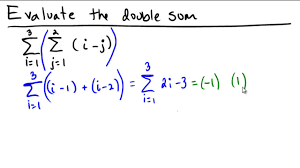

In [25]:
from sympy import summation, oo, symbols, log
i, n, m = symbols('i n m', integer=True)

In [21]:
from sympy.abc import i, j

In [22]:
#Simgle summation
summation(i - j, (j, 1, 2))

2*i - 3

In [23]:
#Double summation
summation(summation(i - j, (j, 1, 2)), (i, 1, 3))

3

### Warming Up 6

where P and q are functions of z. How can I define P and q such that sp.diff(P, z) returns P' rather than 0?

From what you wrote, sympy can't know P and q are functions of z, can it? So it's treating them as constants - just like all the other variables except z. Your expression does not mention z at all, so it is all a constant expression - and the derivation of a constant is 0, no exceptions.

Make sure sympy knows P and q are functions of z. And obviously, it matters what those functions are - you can't just leave them blank. A square differentiates differently than a square root. If you don't know, sympy will do the best it can:

In [32]:
import sympy as sp

In [33]:
x, y, z, k = sp.symbols('x y z k')
P = sp.Function('P')
q = sp.Function('q')
expr = sp.exp(-sp.I*(P(z)+k/(2*q(z))*(x**2 + y**2)))
sp.diff(expr, z)

-I*(-k*(x**2 + y**2)*Derivative(q(z), z)/(2*q(z)**2) + Derivative(P(z), z))*exp(-I*(k*(x**2 + y**2)/(2*q(z)) + P(z)))

but if you do know, it can calculate it exactly:

In [35]:
import sympy as sp
x, y, z, k = sp.symbols('x y z k')
P = sp.Lambda(z, z * z)
q = sp.Lambda(z, sp.sqrt(z))
expr = sp.exp(-sp.I*(P(z)+k/(2*q(z))*(x**2 + y**2)))
sp.diff(expr, z)

-I*(-k*(x**2 + y**2)/(4*z**(3/2)) + 2*z)*exp(-I*(k*(x**2 + y**2)/(2*sqrt(z)) + z**2))

In [36]:
sp.diff(P(z), z)

2*z

### Warming Up 7

In [38]:
from sympy import *

x, y, z = symbols('x y z')
X = Symbol('X')

f = Function('f')
df = f(x).diff(x)

expr = f(x) * df.subs(x, z) + df.subs(x, y) + df.subs(x, 0)
expr.replace(f, Lambda(X, cos(X))).doit()

-sin(y) - sin(z)*cos(x)

In [39]:
from sympy import *

x, y, z = symbols('x y z')
X = Symbol('X')

f = Function('f')
df = lambda t: f(t).diff(t) if isinstance(t, Symbol) else f(X).diff(X).subs(X, t)

expr = f(x) * df(z) + df(y) + df(0)
expr.replace(f, Lambda(X, cos(X))).doit()

-sin(y) - sin(z)*cos(x)

### Warming Up 8

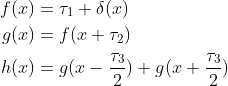

First, there is a difference between expressions and functions. For example, expr = sin(x) + cos(x) is an expression; it is not callable, meaning you can't do expr(y+1) or anything like that (you can do expr.subs(x, y+1), though).

If you want something that looks like sin(x) + cos(x) but is a function, use Lambda (which is SymPy's version of Python's lambda).

In [56]:
f = Lambda(x, sin(x) + cos(x))
f

Lambda(x, sin(x) + cos(x))

Then f(y+1) is sin(y+1) + cos(y+1).

In your notation, that would be

In [57]:
tau_1, tau_2, tau_3, x = symbols("tau_1, tau_2, tau_3, x")
delta = Function("delta")
f = Lambda(x, tau_1 + delta(x))
g = Lambda(x, f(x + tau_2))

In [58]:
f

Lambda(x, tau_1 + delta(x))

In [59]:
g

Lambda(x, tau_1 + delta(tau_2 + x))

In [60]:
sp.diff(g, x)

0

### Warming Up 9

Assuming I have an expression in sympy that I can differentiate with variable (e.g. enter image description here). This is a position expression and I am interested in differentiating it with respect to time to obtain the velocity. Using the following code:

In [64]:
r = sp.symbols('r')
t = sp.symbols('t')
theta= sp.Function('theta')(t)
params = {'r':1,'l':2, 'theta':2*t}
dtheta = theta.diff(t)

xB = r*sp.cos(theta) 
vB = xB.diff(t)
xB

r*cos(theta(t))

In [65]:
vB

-r*sin(theta(t))*Derivative(theta(t), t)

In [66]:
d = {r:1, theta:3.14 * t}
vB.subs(d).doit()

-3.14*sin(3.14*t)

### Warming Up 10

In [67]:
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')
z = sp.symbols('z')
equation_one = sp.Eq(x, z + 2)
equation_two = sp.Eq(y, x + 1)

In [68]:
equation_two.subs(equation_one.lhs,equation_one.rhs)

Eq(y, z + 3)

In [69]:
from sympy import symbols, Eq, solve, sin, sqrt
from scipy.optimize import fsolve


x = symbols('x')
D = symbols('d')
C = symbols('c')

eq1 = 2*sin(x)+sqrt(1-(sin(x))**2)+D*sin(x/2)-sin(2*x)-1-C

values = {
    C: 500,
    D: 1000
}

eq1_in_x = eq1.subs(values)

def f(y):
    return float(eq1_in_x.subs(x,y[0]))

sol = fsolve(f,1) # Here, 1 is an initial guess.
print(sol)

[1.04635456]


In [70]:
from sympy import symbols
from sympy.solvers import solve
x,y,z = symbols('x y z')

expression1 = x + y + 8*z - 2
expression2 = 2*x + 6*y + z - 5
expression1 = expression1.subs(z,100)
expression2 = expression2.subs(z,100)

solution = solve([expression1, expression2], [x, y])
print(solution)

{x: -4693/4, y: 1501/4}


In [76]:
from sympy import symbols, solve
solve(x**2 - 2, x)

[-sqrt(2), sqrt(2)]

In [79]:
m=40
pa=1
pb=2

x, y = symbols('x, y')
eq = pa*x+pb*y-m
soly = solve(eq, y)
soly[0]

20 - x/2

In [81]:
soly[0].subs(x, 2)

19

In [87]:
import sympy
z = sympy.Symbol('z')
f = sympy.Function("f")(z)
expr = sympy.Derivative(sympy.Derivative(f) + f)
expr

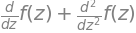

In [88]:
expr.doit()

### Warming Up 11

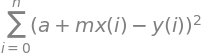

In [99]:
from sympy import *
m, a, i, n = symbols('m a i n')
x, y = symbols('x y', cls=Function)
err = summation((m * x(i) + a - y(i)) ** 2, (i, 0, n))
err

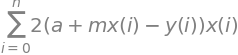

In [100]:
diff(err, m)

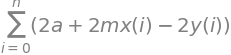

In [101]:
diff(err, a)

$$
f(\mu) = \sum_{i = 1}^{n} (x_i - \mu)^2
$$

In [106]:
m,i,n = symbols('m i n')
x = symbols('x', cls=Function)
f_mu = summation((x(i)-m) ** 2, (i, 1, n))

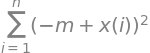

In [107]:
f_mu

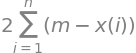

In [110]:
diff(err, m).simplify()

In [111]:
diff(err, m, 2 ).simplify()

### Warming Up 12

In [121]:
x = cos(3)
eq = x + 2
eq

In [122]:
x = Symbol('x')
eq = x + 2
eq

In [126]:
A,B,X,U = symbols('A B X U')
ax = Mul(A, X, evaluate=False)
bu = Mul(B, U, evaluate=False)
eq = Add(ax, bu, evaluate=False)
eq

In [124]:
eq.subs({U:x+x**2, X:3*x})

In [125]:
expand(_)

### Warming Up 13

In [127]:
f = lambdify([x, y], x + y)
f(1, 1)

In [128]:
import  sympy as sp

x, y = sp.symbols('x y')

# function
f = sp.symbols('f', cls=sp.Function)
f_eval = f(x, y)
print(f_eval.subs(x, 2))

# expression
expr = sp.Expr(x*y)
print(expr.subs(x, 3))

# lambdify
f = sp.lambdify(args=[x, y], expr=x*y)
print(f(2, 3))

f(2, y)
Expr(3*y)
6


sympy.Function is for undefined functions. Like if f = Function('f') then f(x) remains unevaluated in expressions.
If you want an actual function (like if you do f(1) it evaluates x**2 + 1 at x=1, you can use a Python function

In [129]:
import sympy
x = sympy.symbols('x')
f = x**2 + 1
sympy.diff(f, x)

In [131]:
from sympy import symbols, exp

x, f = symbols('x, f')
expr = 6 * exp(x)
f_func = 2 * exp(x)

expr.subs({f_func: f})

In [137]:
n = Symbol('n', real=True)

N = Symbol('N', real=True)

summation(n**2, (n, 1, N)) # sum n**2 taking n from 1 to N

In [138]:
solve(summation(n**2, (n, 1, N)) - 55, N)

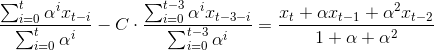

In [139]:
from sympy import summation, symbols, solve, Function, Sum

alpha, C, t, i = symbols('alpha, C, t, i')
x = Function('x')

s1 = Sum(alpha**i * x(t-i), (i, 0, t)) / Sum(alpha**i, (i, 0, t))
s2 = Sum(alpha**i * x(t-3-i), (i, 0, t-3)) / Sum(alpha**i, (i, 0, t-3)) 
rhs = (x(0) + alpha * x(1) + alpha**(2) * x(2))  / (1 + alpha + alpha**(2))

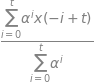

In [140]:
s1

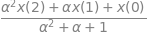

In [141]:
rhs

In [142]:
soln_C = solve(s1 - C*s2 - rhs, C)
soln_C

⎡⎛                               ⎛⎧    1                ⎞   t               ⎞ 
⎢⎜                               ⎜⎪  ─────     for α = 1⎟  ___              ⎟ 
⎢⎜    2                          ⎜⎪  t + 1              ⎟  ╲                ⎟ 
⎢⎜   α ⋅x(2)     α⋅x(1) + x(0)   ⎜⎪                     ⎟   ╲    i          ⎟ 
⎢⎜- ────────── - ───────────── + ⎜⎨  1 - α              ⎟⋅  ╱   α ⋅x(-i + t)⎟⋅
⎢⎜   2              2            ⎜⎪──────────  otherwise⎟  ╱                ⎟ 
⎢⎜  α  + α + 1     α  + α + 1    ⎜⎪     t + 1           ⎟  ‾‾‾              ⎟ 
⎢⎜                               ⎜⎪1 - α                ⎟ i = 0             ⎟ 
⎢⎝                               ⎝⎩                     ⎠                   ⎠ 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                        t - 3                                
⎢                                         ___                                 
⎢                                         ╲         

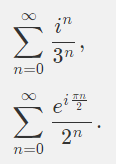

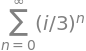

In [144]:
>>> from sympy import I, oo, Sum, exp, pi
>>> from sympy.abc import n
>>> Sum((I/3)**n,(n,0,oo))

In [145]:
Sum((I/3)**n,(n,0,oo)).doit()

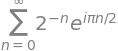

In [146]:
Sum(exp(I*pi*n/2)/2**n,(n,0,oo)).doit()

In [147]:
_.n()

The _.n() means "evaluate the last output numerically." "n" is a method that evaluates an expression numerically (if possible), e.g. pi.n(2) -> 3.14.

In [174]:
from sympy import symbols, Matrix, Sum

n = symbols('n', integer=True, nonnegative=True)
expr = n**3 + 2 * n**2 + 3 * n         # f(n)
matrix = Matrix([1, 234, 56, 7, 890])   # A_n

In [175]:
expr

In [176]:
matrix

⎡ 1 ⎤
⎢   ⎥
⎢234⎥
⎢   ⎥
⎢56 ⎥
⎢   ⎥
⎢ 7 ⎥
⎢   ⎥
⎣890⎦

In [179]:
result = Sum(matrix[n, 0] * expr, (n, 0, 4))

In [180]:
result

   4                                   
_______                                
╲                                      
 ╲                                     
  ╲                       ⎛⎡ 1 ⎤⎞      
   ╲                      ⎜⎢   ⎥⎟      
    ╲                     ⎜⎢234⎥⎟      
     ╲  ⎛ 3      2      ⎞ ⎜⎢   ⎥⎟      
     ╱  ⎝n  + 2⋅n  + 3⋅n⎠⋅⎜⎢56 ⎥⎟[n, 0]
    ╱                     ⎜⎢   ⎥⎟      
   ╱                      ⎜⎢ 7 ⎥⎟      
  ╱                       ⎜⎢   ⎥⎟      
 ╱                        ⎝⎣890⎦⎠      
╱                                      
‾‾‾‾‾‾‾                                
 n = 0                                 

In [181]:
result.doit()

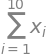

In [182]:
>>> i = Symbol('i'); x = IndexedBase('x')
>>> Sum(x[i],(i,1,10))

In [183]:
_.doit()

### Warming Up 13

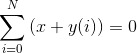

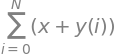

In [186]:
from sympy import *

i, N, x = symbols("i, N, x")
y = symbols('y', cls=Function)
eq         = summation(x + y(i), (i, 0, N))
eq

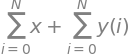

In [187]:
expand(eq)

In [189]:
print(expand(eq))

Sum(x, (i, 0, N)) + Sum(y(i), (i, 0, N))


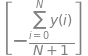

In [188]:
solve(summation(x, (i, 0, N)) + summation(y(i), (i, 0, N)), x)

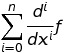

In [190]:
from sympy import diff

def sum_diff_order(f,x,n):
    g = 0
    for i in range(n+1):
        g += diff(f,x,i)
    return g

In [194]:
x = symbols('x')
f_10 = x**10
sum_diff_order(f_10,x,5)

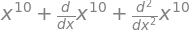

In [203]:
import sympy as sp

x = sp.symbols('x')
f = sp.Function('f')

n = 2
result=sum([f(x).diff(x,i) for i in range(n+1)])
result.subs(f(x), f_10)

In [204]:
result.subs(f(x), f_10).doit()

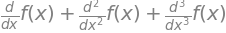

In [207]:
x, i = symbols("x i")
f = Function("f")(x)
sum(diff(f,x,j) for j in range(1,4))

### Warming Up 14

$$
\frac{d^m}{dx^m}\log(1+\sum_{k=1}^N n_kx^k)\Biggr|_{x=0}?
$$

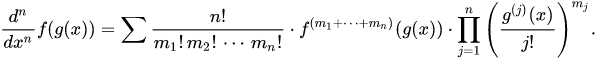

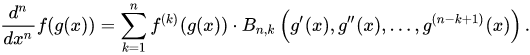

Faà di Bruno's formula

In [28]:
from sympy import *

x,n1,n2,n3=symbols('x,n1,n2,n3')

def f(x):
    return -log(x)
def g(x):
    return n3*x**3+n2*x**2+n1*x+1

In [29]:
f(x)

-log(x)

In [30]:
g(x)

n1*x + n2*x**2 + n3*x**3 + 1

In [31]:
f(g(x))

-log(n1*x + n2*x**2 + n3*x**3 + 1)

In [32]:
n = 3
diff(f(g(x)),x,n).subs(x,0)

-2*n1**3 + 6*n1*n2 - 6*n3

In [48]:
v = map(lambda k: diff(g(x),x,k).subs(x,0), range(1,n+1))
print(list(v))

[n1, 2*n2, 6*n3]


In [51]:
from sympy import bell
s = 0
for k in range(1,n+1):
    s +=diff(f(x),x,k).subs(x,g(0))*bell(n,k,list(map(lambda k: diff(g(x),x,k).subs(x,0), range(1,n+1))))
print(s)

-2*n1**3 + 6*n1*n2 - 6*n3


In [52]:
s

-2*n1**3 + 6*n1*n2 - 6*n3

### Warming Up 15

In [57]:
bell(6, 2, symbols('x:6')[1:])

6*x1*x5 + 15*x2*x4 + 10*x3**2

In [58]:
[bell(n) for n in range(11)]

[1, 1, 2, 5, 15, 52, 203, 877, 4140, 21147, 115975]

bell(n) gives the  Bell number, .

bell(n, x) gives the  Bell polynomial, .

bell(n, k, (x1, x2, ...)) gives Bell polynomials of the second kind, .

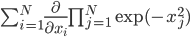

In [60]:
x = IndexedBase("x")
i, j, N = symbols("i j N")
expr = Sum(Product(exp(-x[j]**2), (j, 1, N)).diff(x[i]), (i, 1, N))
expr

Sum(-2*exp(-x[_Dummy_23]**2)*KroneckerDelta(_Dummy_23, i)*x[_Dummy_23]*Product(exp(-x[j]**2), (j, 1, _Dummy_23 - 1))*Product(exp(-x[j]**2), (j, _Dummy_23 + 1, N)), (_Dummy_23, 1, N), (i, 1, N))

In [61]:
Sum(Derivative(Product(exp(-x[j]**2), (j, 1, N)), x[i]), (i, 1, N))

Sum(Derivative(Product(exp(-x[j]**2), (j, 1, N)), x[i]), (i, 1, N))

In [62]:
N*Derivative(Product(exp(-x[j]**2), (j, 1, N)), x[i])

N*Derivative(Product(exp(-x[j]**2), (j, 1, N)), x[i])

In [63]:
expr = Sum(Product(exp(-x[j]**2), (j, 1, N)).rewrite(Sum).diff(x[i]), (i, 1, N))
expr.doit()

Sum(Piecewise((-2*exp(Sum(log(exp(-x[j]**2)), (j, 1, N)))*x[i], (N >= i) & (i >= 1)), (0, True)), (i, 1, N))

In [64]:
e = expr.doit()
p = next(iter(e.atoms(Piecewise)))
e = expand_log(e.xreplace({p: p.args[0][0]}), force=True)
e

Sum(-2*exp(Sum(-x[j]**2, (j, 1, N)))*x[i], (i, 1, N))

In [65]:
x, y, z = symbols('x, y, z')
A = x*y*z
B = x*y

# This is the detail:
type(B)._diff_wrt = True
diff(A, B)

0

### Warming Up 16

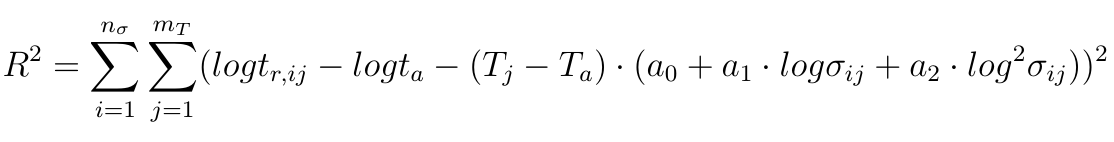

In [66]:
from sympy import*
import numpy as np
init_printing() #delete if you dont have LaTeX installed

logt_r, logt_a, T, T_a, a_0, a_1, a_2, logS, Taa_0, Taa_1, Taa_2  = symbols('logt_r, logt_a, T, T_a, a_0, a_1, a_2, logS, Taa_0, Taa_1, Taa_2')

A = (logt_r - logt_a - (T - T_a) * (a_0 + a_1 * logS + a_2 * logS**2) )**2
parametri = [logt_a, a_0, Taa_0, a_1, Taa_1, a_2, Taa_2]

In [67]:
A

In [70]:
M = expand(A)
M = M.subs(T_a*a_0, Taa_0)
M = M.subs(T_a*a_1, Taa_1)
M = M.subs(T_a*a_2, Taa_2)
M

In [72]:
koef = [logt_a, a_0, T_a*a_0, a_1, T_a*a_1, a_2, T_a*a_2]
M = expand(A)
K = zeros(len(koef), len(koef))
def odvod_mat(par):
    for j in range(len(par)):
        for i in range(len(par)):
            type(par[i])._diff_wrt = True
            P = diff(M, par[i])/2
            B = P.coeff(par[j])
            K[i,j] = B

            #Removal of T_a
            K[i,j] = K[i,j].subs(T_a, 0)
    return K  
odvod_mat(koef)

⎡                                                           2          2  ⎤
⎢   1        T          -1       T⋅logS     -logS     T⋅logS      -logS   ⎥
⎢                                                                         ⎥
⎢             2                  2                     2     2           2⎥
⎢   T        T         -2⋅T     T ⋅logS   -2⋅T⋅logS   T ⋅logS   -2⋅T⋅logS ⎥
⎢                                                                         ⎥
⎢   0        0          0          0          0          0          0     ⎥
⎢                                                                         ⎥
⎢          2                     2     2           2   2     3           3⎥
⎢T⋅logS   T ⋅logS   -2⋅T⋅logS   T ⋅logS   -2⋅T⋅logS   T ⋅logS   -2⋅T⋅logS ⎥
⎢                                                                         ⎥
⎢   0        0          0          0          0          0          0     ⎥
⎢                                                                         ⎥
⎢      2   2

### Warming Up 17

In [73]:
import sympy
x, y , eps = sympy.symbols('x y eps')
f = sympy.exp(x-y)
f.subs(x,x*eps).subs(y,y*eps).series(eps).removeO().subs(eps,1)

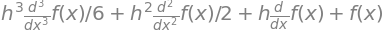

In [82]:
from sympy import *
x, h = symbols('x, h')
f = Function('f')
sum(h**i/factorial(i) * f(x).diff(x, i) for i in range(4))

In [83]:
x, h, a= symbols("x h a")
f = Function("f")
f(x).series(x, x0=h, n=3)

                                              ⎛  2        ⎞│                  
                                            2 ⎜ d         ⎟│                  
                                    (-h + x) ⋅⎜────(f(ξ₁))⎟│                  
                                              ⎜   2       ⎟│                  
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=h    ⎛        3
f(h) + (-h + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + O⎝(-h + x) 
                ⎝dξ₁       ⎠│ξ₁=h                2                            

        
        
        
        
       ⎞
; x → h⎠
        

In [86]:
import sympy as sy

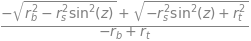

In [102]:
z, d, r_s, N_e, r_t, r_s, r_b = sy.symbols('z  d r_s N_e r_t r_s r_b')

# Define W_model
def W_model(r_t=r_t, r_b=r_b, r_s=r_s, z=z):

    s_model = sy.sqrt(pow(r_t, 2) - pow(r_s*sy.sin(z), 2)) - sy.sqrt(pow(r_b, 2) - pow(r_s*sy.sin(z), 2))
    d_model = r_t - r_b

    STEC_approx = N_e * s_model
    VTEC_approx = N_e * d_model

    return STEC_approx/VTEC_approx

f = W_model() 
# printing Standard model
f

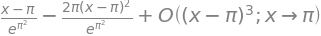

In [122]:
import sympy
x = sympy.Symbol('x')
f = sympy.exp(-x**2)*sympy.sin(x-(sympy.pi))
f.series(x0=pi, n=3)

In [117]:
y = Function("y")
t=sy.symbols('t')
y = sin(t)

y.series(t, 0, 8)

### Warming Up 17

In [130]:
import sympy
x, y= sympy.symbols('x y')

In [133]:
f = sin(x)*cos(y)
stationary_points = solve([f.diff(x), f.diff(y)], [x, y], dict=True)
stationary_points

In [134]:
[f.subs(p) for p in stationary_points]

In [135]:
 max(_)

In [154]:
x, y= sympy.symbols('x y')
F = Function("F")
F(x, y)

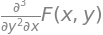

In [155]:
result=F(x,y).diff(x,y, 2)
result

In [158]:
ftest=3*x*y**3
ftest

In [159]:
result.subs(F(x,y), ftest).doit()

### Warming Up 18

In [165]:
import numpy as np

N_x      = 100
N_y      = 100

# straight forward way
result_1 = .0
for x in range(N_x):
    for y in range(N_y):
        result_1 += np.exp( (float(x)/N_x)**2 + ( (float(y)/N_y)**2 ))
result_1

In [166]:
x = np.arange(N_x)
y = np.arange(N_y)

xx, yy = np.meshgrid(x, y)
result = np.sum(np.exp((xx/N_x)**2 + (yy/N_y)**2))
result

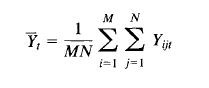

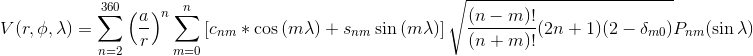

\begin{equation}
V(r, \phi, \lambda) = \sum_{n=2}^{360}\left(\frac{a}{r}\right)^{n}\sum_{m=0}^{n}\left[c_{nm}*\cos{(m\lambda)} + s_{nm}*\sin{(m\lambda)}\right]*\sqrt{\frac{(n-m)!}{(n+m)!}(2n + 1)(2 - \delta_{m0})}P_{nm}(\sin{\lambda})
\end{equation}

$$
P_2(x,y) = \sum_{i=0}^2 \sum_{j=0}^{2 - i} \frac{\frac{d^{(i+j)}f}{∂x^i∂y^{j}}(a,b) }{i!j!}(x-a)^i(y-b)^j
$$

$$
f (x, y) \approx Q(x, y) = f (a, b) + f_x(a, b) (x - a) + f_y(a, b) (y - b) + \frac{f_{xx}(a, b)}{2}(x-a)^2 + f_{xy}(a,b)(x-a)(y-b) + \frac{f_{yy}(a, b)}{2}(y-b)^2 \label{tp2}
$$

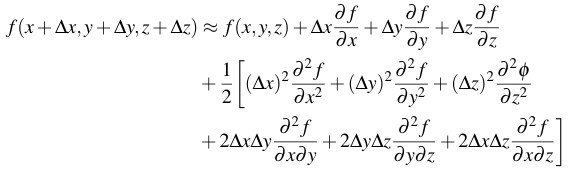

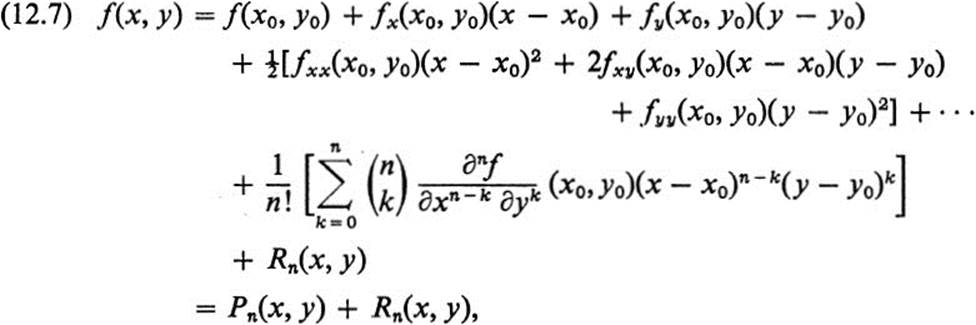

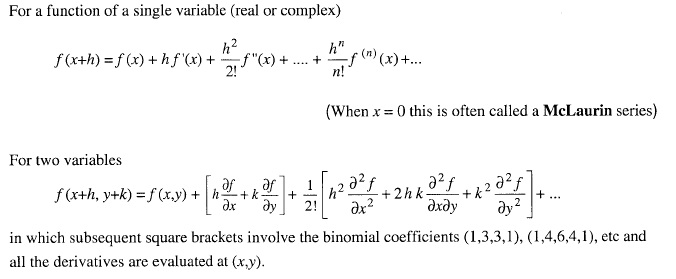

In [114]:
from sympy.core.function import ArgumentIndexError
x, y, z = symbols('x y z')
class f(Function):
   @classmethod
   def eval(cls, x, y):
       pass

   def fdiff(self, argindex):
       if argindex == 1:
          return 1
       raise ArgumentIndexError(self, argindex)

In [115]:
f(x, y).diff(x)

In [116]:
f(x, y).diff(y)